<a href="https://colab.research.google.com/github/WinterBlue16/keras/blob/master/keras26_mnist_matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# CNN을 이용한 MNIST 분류

from keras.datasets import mnist
from keras.models import Sequential 
from keras.layers import Dense, Flatten, MaxPooling2D
from keras.callbacks import EarlyStopping 
import numpy as np

# 1. 데이터 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# print(x_train)
# print(y_train)
print(x_train.shape)
print(y_train.shape)

# 2. 데이터 전처리
x_train = x_train.reshape(x_train.shape[0],-1).astype('float32')/255
x_test = x_test.reshape(x_test.shape[0],-1).astype('float32')/255

# print(type(x_train))

# 2-1. One-hot-Encoding
# softmax를 적용하기 위한 필수적인 과정
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

print(y_train.shape) # 분류 클래스 개수만큼 생성

# 3. model 만들기
model = Sequential()
model.add(Dense(128, input_shape=(784,)))# activation은 add()가 아닌 Dense()에 포함되어 있다!
model.add(Dense(32))
model.add(Dense(32))
model.add(Dense(32))
model.add(Dense(10, activation='softmax'))# activation은 add()가 아닌 Dense()에 포함되어 있다!

model.summary()

# 4. Model 훈련하기
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='loss', patience=20)
hist = model.fit(x_train, y_train, validation_split=0.2, 
          epochs=10, batch_size=8, verbose=1,
          callbacks=[early_stopping])

print(hist.history.keys())

acc = model.evaluate(x_test, y_test)
# print(acc)



Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(60000, 10)



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                330       
Total params: 107,050
Trainable params: 107,050
Non-trainable params: 0
_________________________________________________________________


Instruc

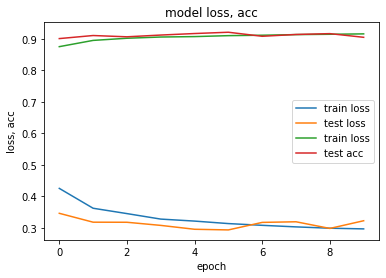

In [2]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model loss, acc')
plt.xlabel('epoch')
plt.ylabel('loss, acc')
plt.legend(['train loss', 'test loss', 'train loss', 'test acc'])
plt.show()